# 2012年後

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_266019row_cleaned.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266019 entries, 0 to 266018
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  266019 non-null  object 
 1   土地位置建物門牌              266019 non-null  object 
 2   交易年月日                 266019 non-null  object 
 3   建築完成年月                231997 non-null  float64
 4   建物移轉總面積平方公尺           266019 non-null  float64
 5   有無管理組織                266019 non-null  object 
 6   總價元                   266019 non-null  int64  
 7   單價元平方公尺               266019 non-null  float64
 8   備註                    78495 non-null   object 
 9   編號                    266019 non-null  object 
 10  緯度                    266019 non-null  float64
 11  經度                    266019 non-null  float64
 12  bad_count             266019 non-null  float64
 13  good_count            266019 non-null  float64
 14  建築型態清整                266019 non-null  object 
 15  

# unitPrice outliers

In [4]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

鄉鎮市區                         0
土地位置建物門牌                     0
交易年月日                        0
建築完成年月                   34022
建物移轉總面積平方公尺                  0
有無管理組織                       0
總價元                          0
單價元平方公尺                      0
備註                      187524
編號                           0
緯度                           0
經度                           0
bad_count                    0
good_count                   0
建築型態清整                       0
陽台有無                         0
是否含額外土地                      0
建築型態_住商大樓                    0
建築型態_公寓                      0
建築型態_其他                      0
建築型態_透天厝                     0
房地總價元                        0
格局比例_房                       0
格局比例_廳                       0
格局比例_衛                       0
格局比例_隔間                      0
是否包含車位                       0
建材_磚石                        0
建材_鋼筋                        0
建材_鋼骨                        0
建材_竹木                        0
住                            0
商       

In [5]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', 'KDE_0.5km_x', 'KDE_1km_x', 'KDE_1.5km_x',
       'KDE_0.5km_y', 'KDE_1km_y', 'KDE_1.5km_y'],
      dtype='object')

In [6]:
# 計算四分位數
Q1 = df['房地總價元(坪)'].quantile(0.25)
Q3 = df['房地總價元(坪)'].quantile(0.75)
IQR = Q3 - Q1

# 計算極端值範圍
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 篩選出極端值
outliers_totalPrice = df[(df['房地總價元(坪)'] < lower_bound) | (df['房地總價元(坪)'] > upper_bound)]

# 將 '房地總價元(坪)' 除以 10000，轉換成每坪萬元
outliers_totalPrice['單價元每坪(萬)'] = outliers_totalPrice['單價元每坪'] / 10000

# 輸出極端值的數量
print(f"極端值數量: {len(outliers_totalPrice)}")


極端值數量: 13702


In [7]:
# 計算四分位數
Q1 = df['單價元每坪'].quantile(0.25)
Q3 = df['單價元每坪'].quantile(0.75)
IQR = Q3 - Q1

# 計算極端值範圍
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 篩選出極端值
outliers_unitPrice = df[(df['單價元每坪'] < lower_bound) | (df['單價元每坪'] > upper_bound)]

# 輸出極端值的數量
print(f"極端值數量: {len(outliers_unitPrice)}")

# 輸出包含所有欄位的極端值
print(outliers_unitPrice)

極端值數量: 7106
       鄉鎮市區                                           土地位置建物門牌       交易年月日  \
4       中西區                                    臺南市中西區南寧街１３６巷９號  2022-08-01   
83      安南區                                       臺南市安南區布袋七街１號  2022-08-15   
158     永康區                                臺南市永康區東橋七路３６１號十七樓之８  2022-08-02   
416     安平區                                      臺南市安平區文平路２４２號  2022-07-15   
479     中西區                                     臺南市中西區國華街三段４３號  2022-07-21   
527     中西區                                    臺南市中西區金華路三段１９７號  2022-07-25   
540      北區                                       臺南市北區小東路３１１號  2022-07-16   
560     麻豆區                                       臺南市麻豆區２８號  2022-07-04   
598      北區                                      臺南市北區大興街９６巷７號  2022-07-29   
655     永康區                                    臺南市永康區大灣路９６０巷２號  2022-07-07   
687     中西區                                      臺南市中西區南門路２５７號  2022-07-22   
728     中西區                                    臺南市中西

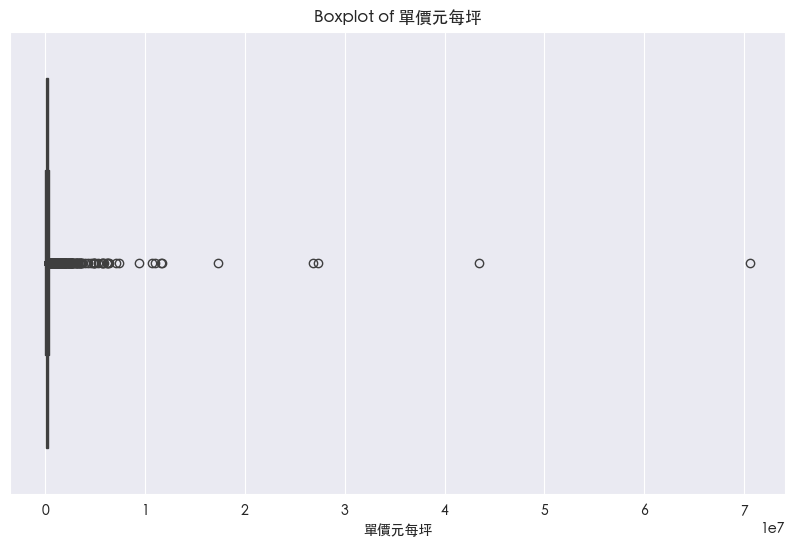

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['單價元每坪'])
plt.title('Boxplot of 單價元每坪')
plt.show()

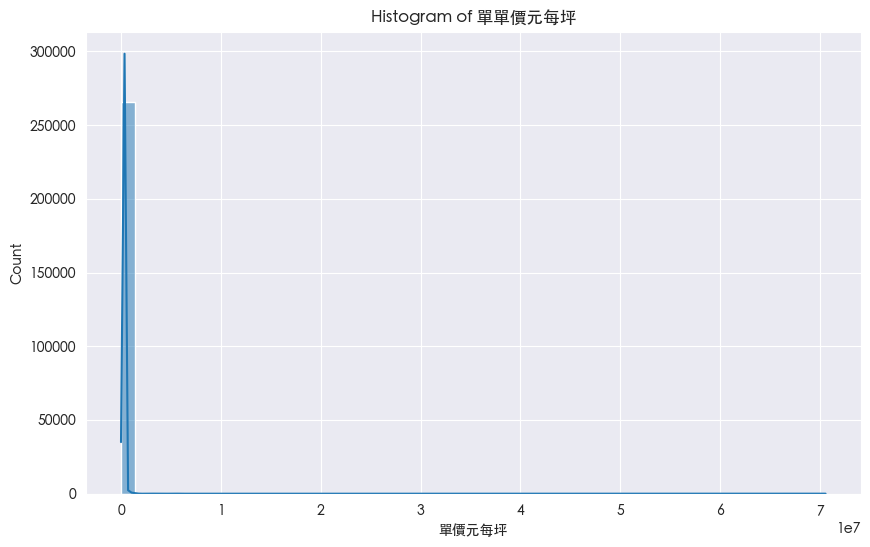

In [9]:

plt.figure(figsize=(10, 6))
sns.histplot(df['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單單價元每坪')
plt.show()

In [10]:
df_cleaned_unitPrice = df.drop(outliers_unitPrice.index)

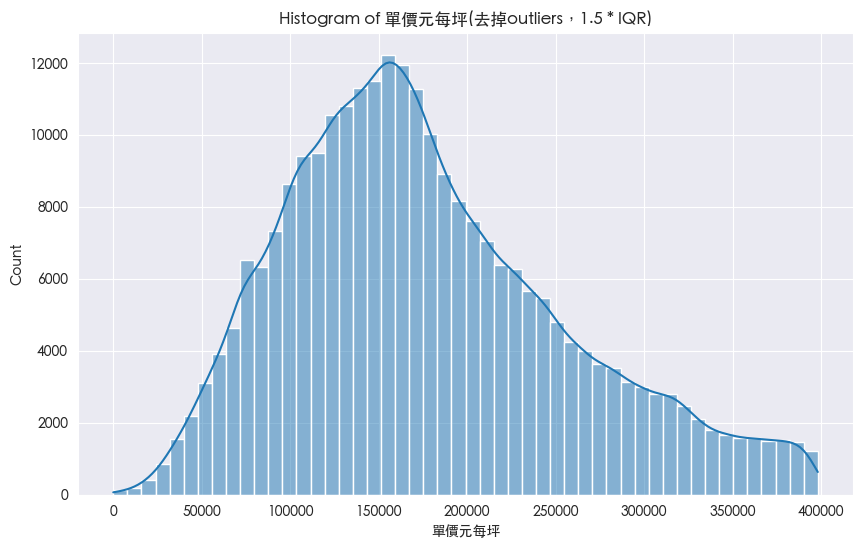

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_unitPrice['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪(去掉outliers，1.5 * IQR)')
plt.show()

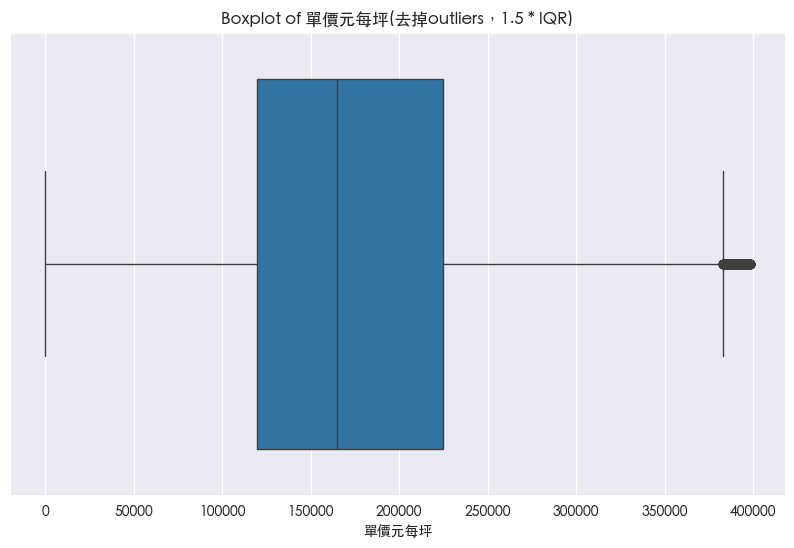

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned_unitPrice['單價元每坪'])
plt.title('Boxplot of 單價元每坪(去掉outliers，1.5 * IQR)')
plt.show()

In [13]:
df_cleaned_unitPrice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258913 entries, 0 to 266018
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  258913 non-null  object 
 1   土地位置建物門牌              258913 non-null  object 
 2   交易年月日                 258913 non-null  object 
 3   建築完成年月                228756 non-null  float64
 4   建物移轉總面積平方公尺           258913 non-null  float64
 5   有無管理組織                258913 non-null  object 
 6   總價元                   258913 non-null  int64  
 7   單價元平方公尺               258913 non-null  float64
 8   備註                    76517 non-null   object 
 9   編號                    258913 non-null  object 
 10  緯度                    258913 non-null  float64
 11  經度                    258913 non-null  float64
 12  bad_count             258913 non-null  float64
 13  good_count            258913 non-null  float64
 14  建築型態清整                258913 non-null  object 
 15  陽台有無 

In [14]:
df_cleaned_unitPrice.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_258913row_unitPrice_outlier_iqr_2024.csv',index=False)